#  Analyse de Données & Classification 2  

## TP 1 à 3  : Reconnaissance de commandes audio par programmation dynamique (DTW)


**Nom :*AMAL*

**Prénom :*Hamza*

**Nom du binôme :*AMAL-Charko*

Ces trois séances de TP vont vous permettre de tester l'algorithme de programmation dynamique vu en CTD puis de réaliser la mise en oeuvre d'un système de reconnaissance audio de mots isolés (constituant des
commandes pour les drones).



Ces séances se décomposent en 3 parties : 
- Partie I : DTW et application du TD
- Partie II : Système de reconnaissance audio de mots de commande
- Partie III : Comparaison de la programmation dynamique avec une méthode de classification après prétraitement des données

Pour les **parties II et III**, vous testerez le système de reconnaissance audio sur deux corpus de voix qui serviront respectivement de base d'apprentissage (références) et de base de test (sons à reconnaître) que vous choisirez. La liste des 13 commandes au drone sont : *Atterrissage, Décollage, Avance, Tourne droite, Recule, Tourne gauche, Droite, Fais un flip, Gauche, Arrête toi, plus haut, plus bas et Etat d'urgence.*


## Travail à réaliser
Par binôme (uniquement), 
1. **Proposer une étude** que vous détaillerez sur un rapport
[par exemple, *influence voix masculines VS voix féminines, confronter vos propres voix à la base de données, tester l'impact de différents bruits de fond sur la reconnaissance...*];
2. Créer, en fonction de l'objectif de votre étude, vos propres base d'apprentissage et base de test à partir du corpus proposé et des voix et bruits que vous aurez enregistrés [*paramètres audio : 16 KHz, mono, 16 bits, format *.wav**];
3. Tester la DTW et une méthode de classification avec prétraitement par ACP;
4. Evaluer les résultats; 
5. Rédiger un rapport en pdf présentant l'étude, les résultats par les 2 méthodes et vos commentaires et conclusions sur votre étude (Longueur max. : 5 pages).

In [0]:
import matplotlib.pyplot as plt
from numpy import array, zeros, full, argmin, inf, ndim
import scipy
import sklearn
import math

# Partie I : Implémentation de l'algorithme de programmation dynamique 


1. Ecrivez une fonction en python DTW qui implémente le calcul et l'affichage de la matrice des coûts définie en CTD. 

2. Afin d'adapter facilement le calcul des coûts suivant la nature des données (et donc des distances utilisées), écrivez une fonction pour chaque distance (euclidienne, lettres, sons) qui apparaîtra en paramètre de la fonction DTW.

In [0]:

# Définition des distances
import numpy as np
def d_euclidienne(x, y):
    return abs(x-y)

def d_mot(x, y):
    if x == y:
        return 0
    else:
        return 1
def d_vecteur(x, y):
  return( np.linalg.norm(x-y))

def DTW(I,J,w0,w1,w2,distance):
    n = len(I) 
    p = len(J)
    g = zeros((n+1,p+1))
    g[0,0] = 0
    for j in range (1,p+1):
        g[0,j] = inf;
    for i in range(1,n+1):
        g[i,0] = inf;
        for j in range(1,p+1):
            # recherche du chemin minimal
            d = distance(I[i-1],J[j-1])
            g[i,j] = min(g[i-1,j]+w0*d, g[i-1,j-1]+w1*d, g[i,j-1]+w2*d)

    score = g[n,p]/(n+p)
    return [g, score]
    




In [0]:
def chemin(g):
  n,p = g.shape
  chemin = [[n-1,p-1]]
  i = n-1
  j = p-1
  while i>0 and j>0:
    if i==0:
      j = j-1
    elif j==0:
      i = i-1
    else:
      if g[i-1, j] == min(g[i-1, j-1], g[i-1, j], g[i, j-1]):
        i = i-1
      elif g[i, j-1] == min(g[i-1, j-1], g[i-1, j], g[i, j-1]):
        j = j-1
      else:
        i = i-1
        j = j-1
    chemin.append([j, i])
  #chemin.append([0, 0])
  return chemin

### Application aux exercices 

1. Testez vos programmes sur les exercices vus en TD. 

2. Modifiez les contraintes locales c'est-à-dire les pondérations suivant les directions. 

3. Ajoutez la prise en compte de contraintes globales c'est-à-dire le non calcul lorsque les cases sont trop éloignées de la diagonale (cf exercice TD séquence ADN). A partir de quelle position les contraintes globales ne changent pas les résultats ?

In [10]:
I= [-2,10,-10,15,-13,20,-5,14,2]
J= [3,-13,14,-7,9,-2]

print("********** Exemple 1**********")
[A,score_1] = DTW(I,J,1,1,1,d_euclidienne)
print("La matrice du coût est: ")
print(A)
print("Le score est: ")
print(score_1)
path = chemin(A)
print("le chemin est:")
print(path)




********** Exemple 1**********
La matrice du coût est: 
[[  0.  inf  inf  inf  inf  inf  inf]
 [ inf   5.  16.  32.  37.  48.  48.]
 [ inf  12.  28.  20.  37.  38.  50.]
 [ inf  25.  15.  39.  23.  42.  46.]
 [ inf  37.  43.  16.  38.  29.  46.]
 [ inf  53.  37.  43.  22.  44.  40.]
 [ inf  70.  70.  43.  49.  33.  55.]
 [ inf  78.  78.  62.  45.  47.  36.]
 [ inf  89. 105.  62.  66.  50.  52.]
 [ inf  90. 104.  74.  71.  57.  54.]]
Le score est: 
3.6
le chemin est:
[[9, 6], [5, 8], [4, 7], [3, 6], [2, 5], [1, 4], [1, 3], [1, 2], [1, 1], [0, 0]]


In [11]:
mot1 = "ATGGTACGTC"
mot2 = "AAGTAGGC"

print("********** Exemple 2**********")
[C,score_2] = DTW(mot2,mot1,1,2,1,d_mot)
print("La matrice du coût est : ")
print(C)
print("le score est:")
print(score_2)

path = chemin(C)
print("le chemin est:")
print(path)


********** Exemple 2**********
La matrice du coût est : 
[[ 0. inf inf inf inf inf inf inf inf inf inf]
 [inf  0.  1.  2.  3.  4.  4.  5.  6.  7.  8.]
 [inf  0.  1.  2.  3.  4.  4.  5.  6.  7.  8.]
 [inf  1.  2.  1.  1.  2.  3.  4.  4.  5.  6.]
 [inf  2.  1.  2.  2.  1.  2.  3.  4.  4.  5.]
 [inf  2.  2.  3.  3.  2.  1.  2.  3.  4.  5.]
 [inf  3.  3.  2.  2.  3.  2.  3.  2.  3.  4.]
 [inf  4.  4.  2.  2.  3.  3.  4.  2.  3.  4.]
 [inf  5.  5.  3.  3.  4.  4.  3.  3.  4.  3.]]
le score est:
0.16666666666666666
le chemin est:
[[8, 10], [9, 7], [8, 7], [8, 6], [7, 5], [6, 5], [5, 4], [4, 3], [3, 3], [2, 2], [1, 2], [1, 1], [0, 0]]


In [0]:
# La contrainte globale.
# on met inf dans les cases dont s'appliquent les contraintes globales.


def DTW_contrainte_globale(I,J,w0,w1,w2,bande,distance):
    n = len(I) 
    p = len(J)
    g = zeros((n+1,p+1))
    g[0,0] = 0
    for j in range (1,p+1):
        g[0,j] = inf;
    for i in range(1,n+1):
        g[i,0] = inf;
        for j in range(1,p+1):
            if j >= max(1,i-bande) and j<= min(i+bande,p+1): 
                d = distance(I[i-1],J[j-1])
                g[i,j] = min(g[i-1,j]+w0*d, g[i-1,j-1]+w1*d, g[i,j-1]+w2*d)
            else:
                g[i,j] = inf
        
        
        
    score = g[n,p]/(n+p)
    return [g, score]

    



In [230]:
[C,score_4] = DTW_contrainte_globale(mot2,mot1,1,1,1,4,d_mot)
print("La matrice du coût est: ")
print(C)
print("Le score est:")
print(score_4)

La matrice du coût est: 
[[ 0. inf inf inf inf inf inf inf inf inf inf]
 [inf  0.  1.  2.  3.  4. inf inf inf inf inf]
 [inf  0.  1.  2.  3.  4.  4. inf inf inf inf]
 [inf  1.  1.  1.  1.  2.  3.  4. inf inf inf]
 [inf  2.  1.  2.  2.  1.  2.  3.  4. inf inf]
 [inf  2.  2.  2.  3.  2.  1.  2.  3.  4. inf]
 [inf inf  3.  2.  2.  3.  2.  2.  2.  3.  4.]
 [inf inf inf  2.  2.  3.  3.  3.  2.  3.  4.]
 [inf inf inf inf  3.  3.  4.  3.  3.  3.  3.]]
Le score est:
0.16666666666666666


# Partie II :  Système de reconnaissance audio de mots de commande

Sur l'espace partagé, vous trouverez des enregistrements audio de mots de commandes pour un drone quadricoptère constitués de plusieurs locuteurs masculins (notés M01..M13) et locutrice féminines (F01..F05).

Vous pouvez diviser ainsi l'ensemble des données en base d'apprentissage qui serviront de références et base de test pour évaluer la reconnaissance par programmation dynamique.

In [0]:
import librosa

Les lignes de code suivantes permettent de transformer le fichier audio en matrice de paramètres appélés MFCC (Mel Frequency Cepstral Coefficient) en utilisant la librairie python *librosa*. Ces paramètres permettent d'extraire au mieux le contenu vocal fréquenciel de signal audio.

La matrice de sortie est composée d'autant de vecteurs colonnes que de trames d'analyses. Le nombre de lignes correspond à la dimension du vecteur représentatif : ici 12.

**Chargement d'un fichier audio :**

In [0]:
y, sr = librosa.load("./M01_arretetoi.wav")


**Calcul des MFCC**

In [233]:
mfcc = librosa.feature.mfcc(y=y, sr=sr, hop_length=1024, htk=True, n_mfcc=12)
print("Nb Coeff MFCC x Nb Fenetres :",mfcc.shape)


Nb Coeff MFCC x Nb Fenetres : (12, 32)


In [0]:
import os
# Cette fonction retourne les mfccs de la base d'apprentissage
def mfcc_train_test(path_train, path_test):
  files_train = os.listdir(path_train) 
  files_test = os.listdir(path_test)
  matrix_mfcc_train = [] # pour stocker les mfccs de tous les enregistrements audio de la base d'apprentissage.
  matrix_mfcc_test = [] # pour stocker les mfccs de tous les enregistrements audio du test.
  for file in files_train:
    y, sr = librosa.load("./"+path_train+"/" + file)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, hop_length=1024, htk=True, n_mfcc=12)
    matrix_mfcc_train.append(mfcc)

  for file in files_test:
    y, sr = librosa.load("./"+path_test+"/" + file)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, hop_length=1024, htk=True, n_mfcc=12)
    matrix_mfcc_test.append(mfcc)
  return [matrix_mfcc_train, matrix_mfcc_test, files_train, files_test]

**Application de la DTW**

1. Réaliser une étude que vous détaillerez sur un rapport (par exemple, *influence voix masculines VS voix féminines, confronter votre propre voix à la base de données, tester l'impact de différents bruits de fond sur la reconnaissance...*) et créer votre propre base d'apprentissage et votre base de test à partir du corpus et des voix et bruits que vous aurez enregistrés. 

2. Appliquer la DTW sur vos corpus.

**Paramètres pour enregistrements audio de vos voix perso:**

16 KHz, mono, 16 bits, format *.wav*

**Evaluation de la reconnaissance**

1. Calculer la matrice de confusion du système (en ligne les références et en colonne les sorties du système). 
Vous pourrez utiliser la fonction *confusion_matrix* de la librairie *sklearn*.


2. Calculer le score de reconnaissance : nombre de fichiers bien reconnus sur nombre de fichiers testés. 

*Vérifications :*
-  si vous prenez comme fichier de référence et de test M01, vous devez obtenir aucune erreur.
-  si vous prenez comme fichier de reférénce M01 et fichier de test M02, vous devez obtenir deux erreurs.

In [0]:
# Le premier test consiste à considérer les fichiers M01 non bruités comme fichiers de référence et de test.
# Le deuxième test consiste à prendre comme fichier d'apprentissage les fichiers M01 non bruités , et les fichiers du test tous les fichiers M02.
# Le test 3 consiste à rendre comme fichiers de référence les 

#[matrix_mfcc_train, matrix_mfcc_test, files_train, files_test] = mfcc_train_test("M01_non_bruite", "M01_non_bruite") # Test 1
#[matrix_mfcc_train, matrix_mfcc_test, files_train, files_test] = mfcc_train_test("M01_non_bruite", "M02_non_bruite") # Test 2
#[matrix_mfcc_train, matrix_mfcc_test, files_train, files_test] = mfcc_train_test("M01_non_bruite", "F02_non_bruite") # Test 3
#[matrix_mfcc_train, matrix_mfcc_test, files_train, files_test] = mfcc_train_test("M01_bruite", "M01_bruite") # Test 4
#[matrix_mfcc_train, matrix_mfcc_test, files_train, files_test] = mfcc_train_test("M01_bruite", "M02_bruite") # Test 5
[matrix_mfcc_train, matrix_mfcc_test, files_train, files_test] = mfcc_train_test("M01_non_bruite", "Corpus_Hamza") # Test 5
n = len(matrix_mfcc_test) 
p = len(matrix_mfcc_train)
#matrix_score = zeros((p,n))
L = []
F = []
resultats = [] # Pour faire correspondre à chaque enregistrement audio l'enregistrement le plus proche par application de la DTW.
for i in range(0,n):
  for j in range(0,p):
     [u,score] = DTW(np.transpose(matrix_mfcc_test[i]),np.transpose(matrix_mfcc_train[j]),1,1,1,d_vecteur)
     #matrix_score[i,j] = score
     L.append(score)
  F.append(L.index(min(L)))
  L = []

for k in range(0,len(F)):
    resultats.append(files_train[F[k]])


In [315]:
print(resultats)
print(files_test)

['M01_etatdurgence.wav', 'M01_recule.wav', 'M01_plushaut.wav', 'M01_plusbas.wav', 'M01_plushaut.wav', 'M01_tournegauche.wav', 'M01_plusbas.wav', 'M01_plushaut.wav', 'M01_plushaut.wav', 'M01_gauche.wav', 'M01_gauche.wav', 'M01_faisunflip.wav', 'M01_plushaut.wav']
['H01_etatdurgence.wav', 'H01_arretetoi.wav', 'H01_droite.wav', 'H01_decollage.wav', 'H01_avance.wav', 'H01_tournegauche.wav', 'H01_plusbas.wav', 'H01_tournedroite.wav', 'H01_recule.wav', 'H01_atterrissage.wav', 'H01_gauche.wav', 'H01_faisunflip.wav', 'H01_plus haut.wav']


In [0]:
labels = []
for x in files_test:
  if x[4:] not in labels:
    labels.append(x[4:])

nombre de fichiers de test
13
********************************
nombre de fichiers reconnues
5
********************************
 Le taux de reconnaissance est:
0.38461538461538464
********************************
la matrice de confusion est:


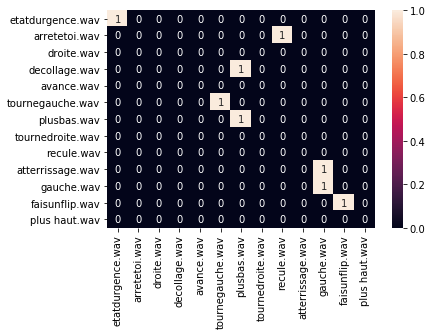

In [317]:
# Calculer la matrice de confusion et le taux de reconnaissance
import seaborn as sb
import pandas as pd
from sklearn.metrics import confusion_matrix

y_true = []
y_pred = []
nb_fichiers_reconnus = 0
for i in range(len(resultats)):
  x = files_test[i][4:]
  y = resultats[i][4:]
  y_true.append(x)
  y_pred.append(y)
  if x == y:
    nb_fichiers_reconnus+=1 
M = confusion_matrix(y_true, y_pred) # La matrice de confusion.
taux_reconnaissance = nb_fichiers_reconnus/len(files_test)
print("nombre de fichiers de test")
print(len(resultats))
print("********************************")
print("nombre de fichiers reconnues")
print(nb_fichiers_reconnus)
print("********************************")
print(" Le taux de reconnaissance est:")
print(taux_reconnaissance)
print("********************************")
print("la matrice de confusion est:")
M = pd.DataFrame(confusion_matrix(y_true, y_pred,labels), columns=labels, index=labels)
sb.heatmap(M, annot=True)


 


## Partie III : Comparaison de la programmation dynamique avec une méthode de classification après prétraitement des données

Dans cette partie, nous allons comparer les résultats de la DTW avec ceux d'une méthode de classification de données : les k-plus proches voisins.

Nous utiliserons les fonctions permettant de calculer l'ACP et les k-ppv via la librairie python *scikit-learn*.




In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from mpl_toolkits.mplot3d import Axes3D

### Prétraitement par ACP

Pour tester une méthode de classification, il faut d'abord réduire la dimension des MFCC

1. Pour chaque enregistrement audio, calculez le vecteur de $R^{13}$ égal à la moyenne sur toutes les fenêtres de
MFCC. Ainsi chaque enregistrement sera représenté par un seul vecteur de 13 coefficients MFCC.

2. A partir de tous les enregistrements de la base d'apprentissage et en utilisant la fonction *PCA* de la librairie *scikit-learn*, calculez les 3 axes principaux de l'ACP en
extrayant les 3 vecteurs propres, notés $X_1$, $X_2$, $X_3$, associés aux 3 plus grandes valeurs propres de la matrice de
variance-covariance $\Sigma_{App}$.Ces vecteurs propres consitueront la nouvelle base de données.

3. Projetez les données de la base d'apprentissage et de test dans cette nouvelle base en multipliant chaque
vecteur par la base $P = [X_1X_2X_3]$.

*Remarque :* vous pouvez aussi implémenter l'ACP en
extrayant les 3 vecteurs propres, notés $X_1$, $X_2$, $X_3$, associés aux 3 plus grandes valeurs propres de la matrice de
variance-covariance $\Sigma_{App}$ (par les fonctions *np.cov* et *np.linalg.eig*). Ces vecteurs propres constitueront le nouveau repère $P$.  Projetez ensuite les données de la base d'apprentissage et de test dans cette nouvelle base en multipliant chaque vecteur par la base $P = [X_1X_2X_3]$.




In [0]:
# Application de l'ACP
from sklearn.decomposition import PCA
from sklearn import preprocessing

mfcc_train_vectorized =[] # pour représenter chaque enregistrement audio de la base d'apprentissage par un vecteur R13
mfcc_test_vectorized = [] # Pour représenter les enregistrement audio de test par un vecteur R13

for elt in matrix_mfcc_train:
  mfcc_train_vectorized.append(elt.mean(1))

for elt in matrix_mfcc_test:
  mfcc_test_vectorized.append(elt.mean(1))

# les dimensions des matrices
[n_train, p_train] = np.array(mfcc_train_vectorized).shape
[n_test, p_test] = np.array(mfcc_test_vectorized).shape

data = np.concatenate((np.array(mfcc_train_vectorized), np.array(mfcc_test_vectorized)), axis=0)

std_scale = preprocessing.StandardScaler().fit(data)
data_scaled = std_scale.transform(data)

X_train = data_scaled[0:n_train,:]
X_test = data_scaled[n_train:,:] 

pca = PCA(n_components=3, svd_solver='full')
pca.fit(X_train)
[X1,X2,X3] = pca.components_ # Les 3 vecteurs principaux;
X_train_projected = pca.transform(X_train)

X_test_projected = pca.transform(X_test)




### Classification par $k$ plus proches voisins

En intelligence artificielle, la méthode des $k$ plus proches voisins (k-ppv) est une méthode d'apprentissage
supervisé. Dans ce cadre, on dispose d'une base de données d'apprentissage constituée de couples  "donnée-label". Pour estimer la sortie associée à une nouvelle entrée $x$, la méthode des $k$ plus proches voisins consiste à prendre
en compte (de façon identique) les $k$ échantillons d'apprentissage dont l'entrée est la plus proche de la nouvelle
entrée $x$, selon une distance à définir. L'algorithme 1 associé et un exemple sont donnés par la suite.

<img src="files/AlgoKppv.png" width="900" height="800"  >

<img src="files/kppv.png" width="300" height="300"  >

**Exemple de classification par $k$-ppv.** L'échantillon de test (cercle vert) doit être classé soit dans la première
classe des carrés bleus, soit dans la deuxième classe des triangles rouges. 
Si $k = 3$ (cercle plein), il est assigné à la deuxième classe parce qu'il y a 2 triangles et seulement 1 carré à l'intérieur du cercle intérieur. 
Si $k = 5$ (cercle en pointillés), il est assigné à la première classe (3 carrés contre 2 triangles à l'intérieur du cercle extérieur)


1. En utilisant la fonction *KNeighborsClassifier* de la librairie *sklearn.neighbors*, réalisez une classification par k-ppv sur la base d'apprentissage et la base de test que vous avez prédéfinies (prendre $k=1$).

2. Evaluez la méthode des k-ppv par le calcul de la matrice de confusion et du taux de reconnaissance.

3. Modifiez la valeur de $k$ pour les k-ppv. Améliorez-vous les scores de reconnaissance ?

4. Comparez vos résultats avec ceux de la DTW.

5. Rédigez un rapport sur votre étude, vos résultats et vos commentaires/conclusions.




In [0]:
# On applique l'algorithme de k plus proche voisin pour k = 1
# Le model
knn=KNeighborsClassifier(n_neighbors=1)
#Les labels
labels = []
for i in range(0,len(files_train)):
  labels.append(files_train[i][4:])

#On entraîne le modèle :
knn.fit(X_train_projected, labels)
# On fait la prédiction
pred_test=knn.predict(X_test_projected)
prediction = []
for j in range(0,len(pred_test)):
  prediction.append(pred_test[j])

In [269]:
#print(labels)
print(y_true)
print(prediction)

['arretetoi.wav', 'decollage.wav', 'tournegauche.wav', 'droite.wav', 'plusbas.wav', 'faisunflip.wav', 'etatdurgence.wav', 'tournedroite.wav', 'gauche.wav', 'plushaut.wav', 'recule.wav', 'atterrissage.wav', 'avance.wav']
['arretetoi.wav', 'decollage.wav', 'tournegauche.wav', 'droite.wav', 'plusbas.wav', 'faisunflip.wav', 'etatdurgence.wav', 'tournedroite.wav', 'gauche.wav', 'plushaut.wav', 'recule.wav', 'atterrissage.wav', 'avance.wav']


In [270]:
c = confusion_matrix(y_true,prediction)
print(c)

[[1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1]]


In [0]:
from numpy import matrix
score = matrix.trace(c)/len(c)

In [272]:
score

1.0